In [72]:
#Librerie utili
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats 




In [73]:
#Import the residual from 2kr excel sheet
excelSheet=pd.read_excel("../excel/2kr.xlsx")

#Lock only the part regarding residuals in the excel sheet and sto in a new dataframe
residualDataframe=excelSheet.loc[0:7,'y1-ym':'y10-ym']

#Rapid check the new dataframe
residualDataframe.head()

,y1-ym,y2-ym,y3-ym,y4-ym,y5-ym,y6-ym,y7-ym,y8-ym,y9-ym,y10-ym
0,-0.075972,-0.0251389,0.0270833,-0.0284722,0.135139,0.036250,-0.188750,0.025972,0.076250,0.017639
1,0.013194,-0.00847222,0.0134722,-0.0204167,-0.05625,-0.010694,0.024306,0.010972,-0.014306,0.048194
2,0.052972,-0.0161944,0.0315833,-0.0120278,-0.0459167,0.000750,0.006861,0.018806,-0.027583,-0.009250
3,0.037083,0.00458333,-0.0318056,0.0506944,0.0204167,-0.023750,-0.003194,-0.013472,-0.041528,0.000972
4,-0.000722,-0.0401667,0.0228889,0.00955556,0.0445556,-0.040444,-0.010722,0.002333,0.021778,-0.009056


# Testing Normal Distribution

In [74]:
#List of the most relevant configurations
final_configurations=[1,3,5,8]

#I need to subtract 1 for get the row in the excel sheet
finalConfigurationRows=[x-1 for x in final_configurations]

print(finalConfigurationRows)

[0, 2, 4, 7]


/Users/fernandodenitto/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


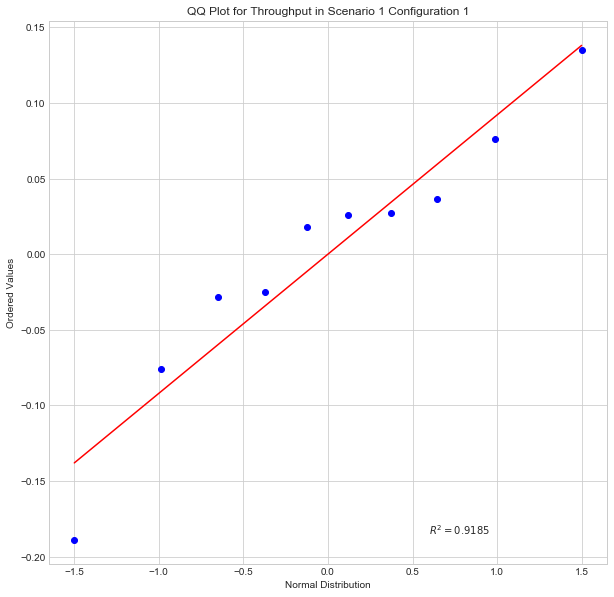

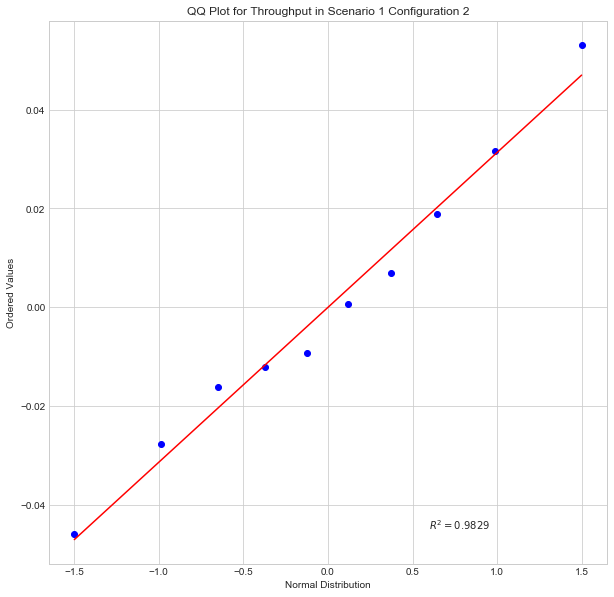

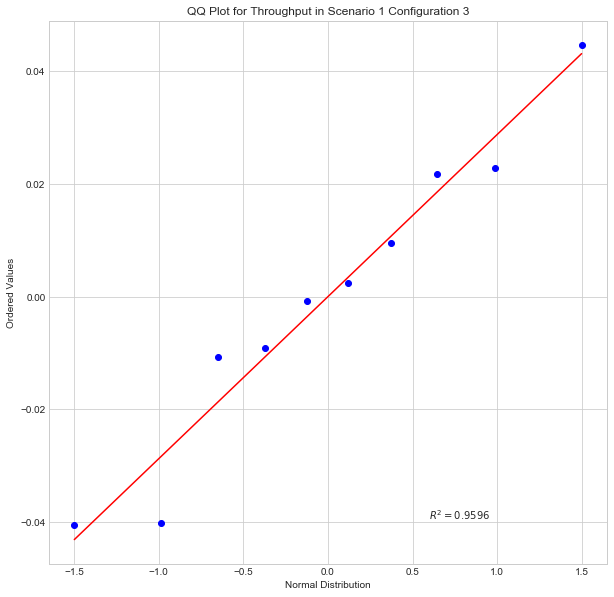

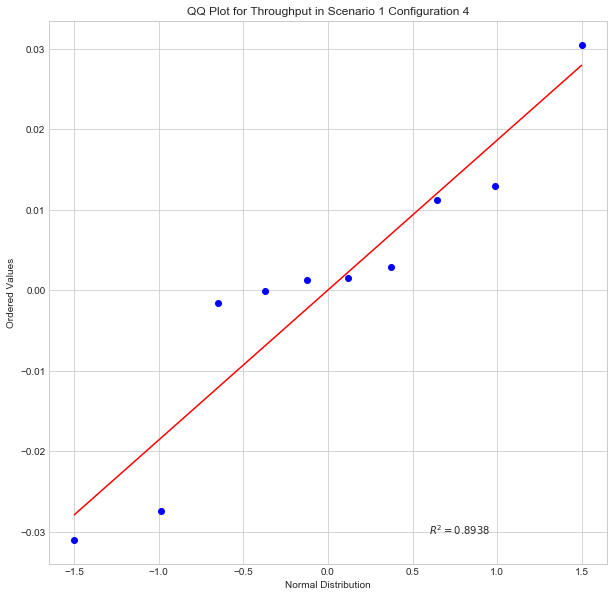

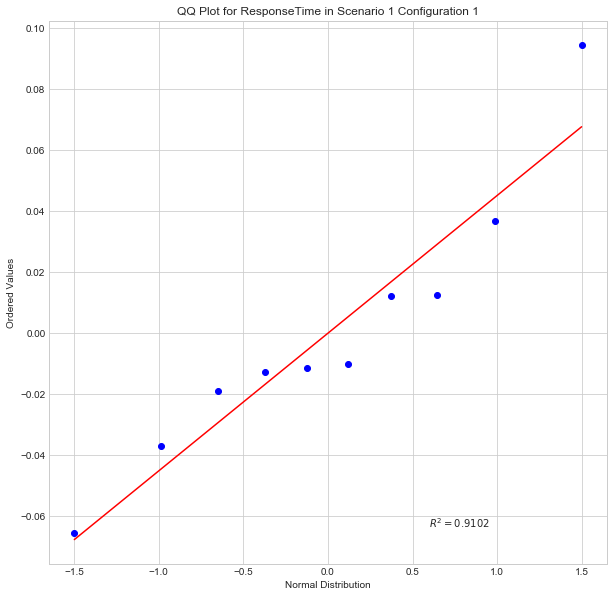

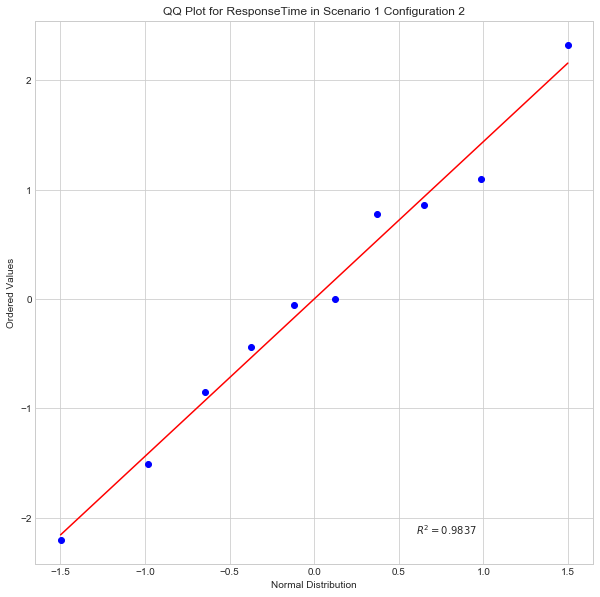

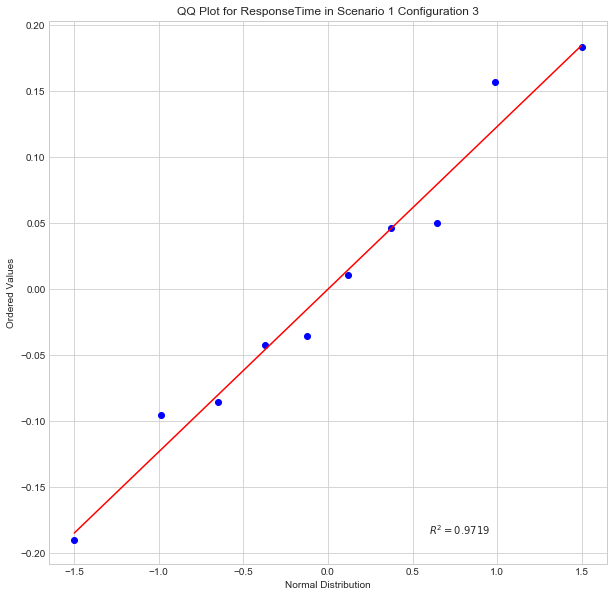

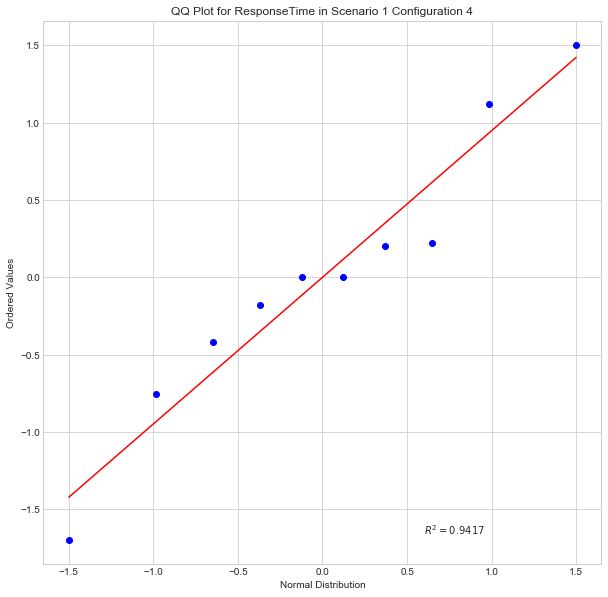

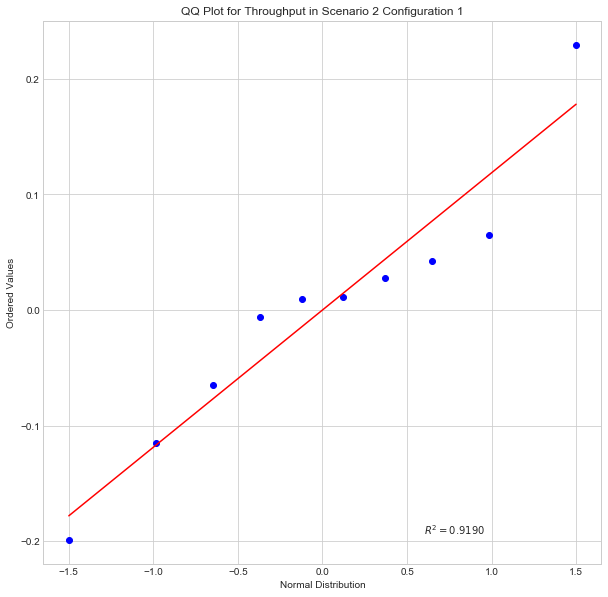

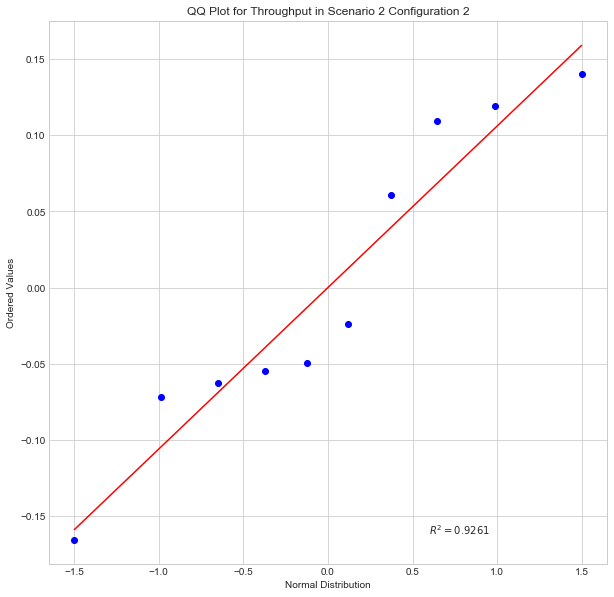

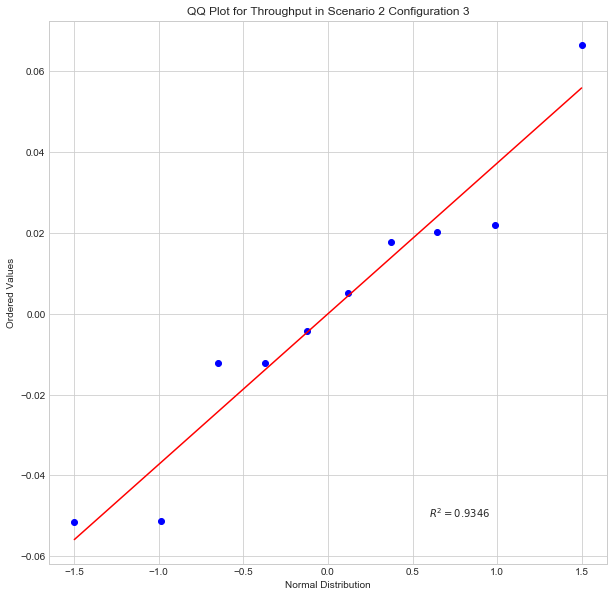

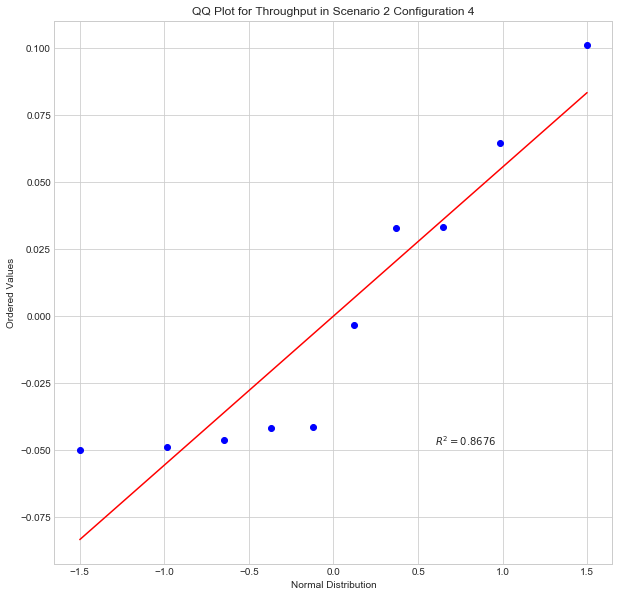

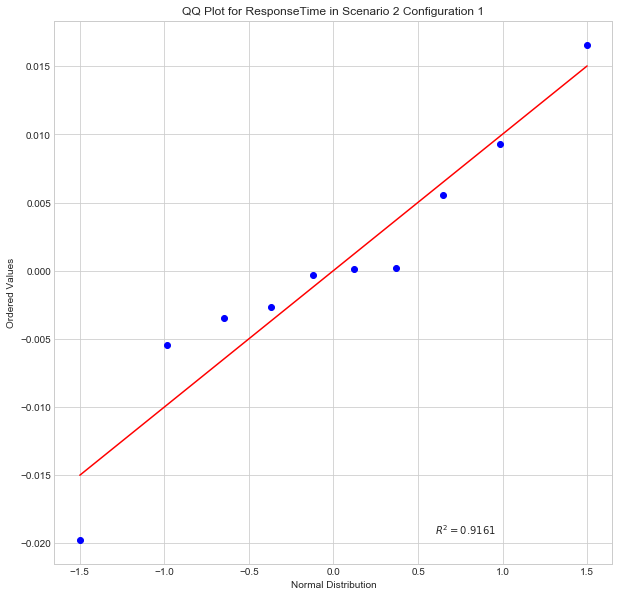

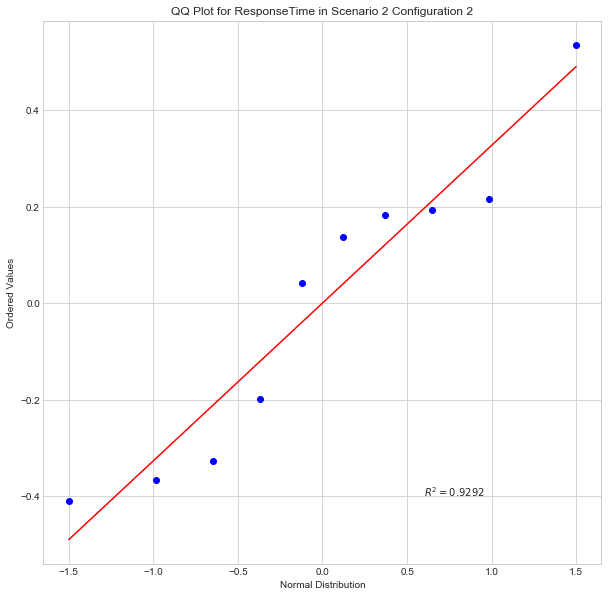

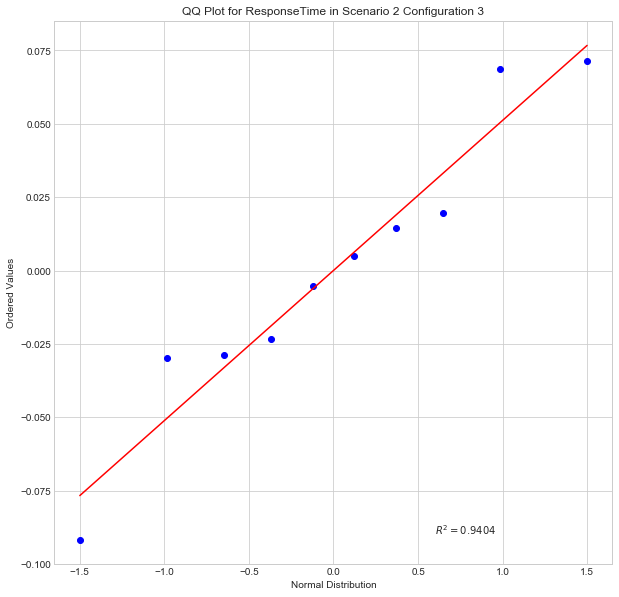

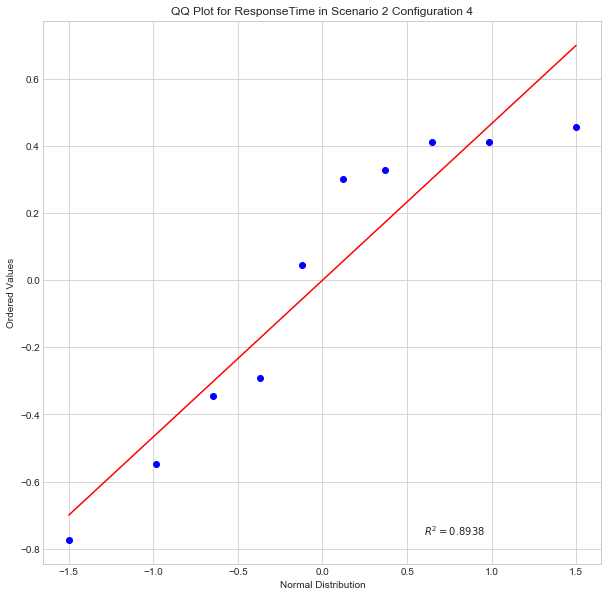

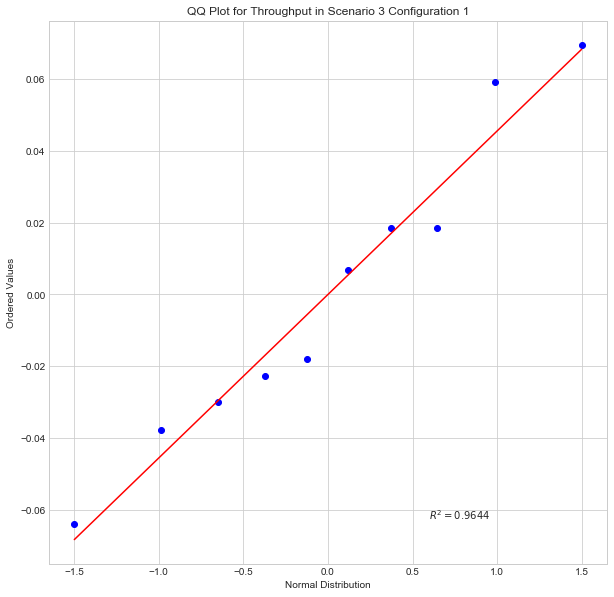

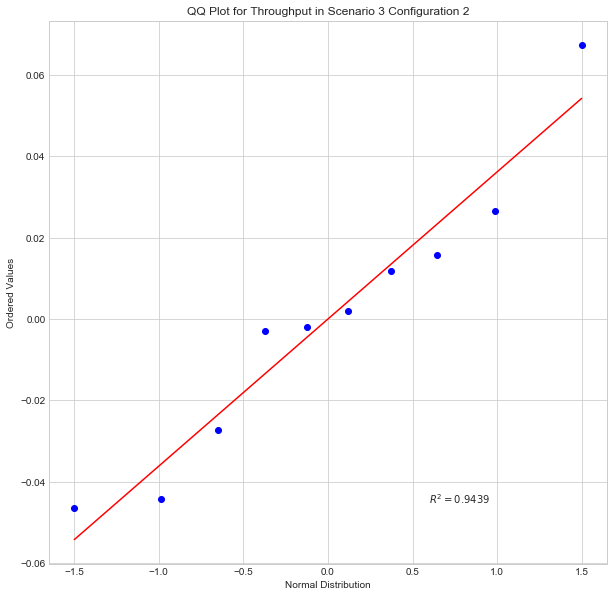

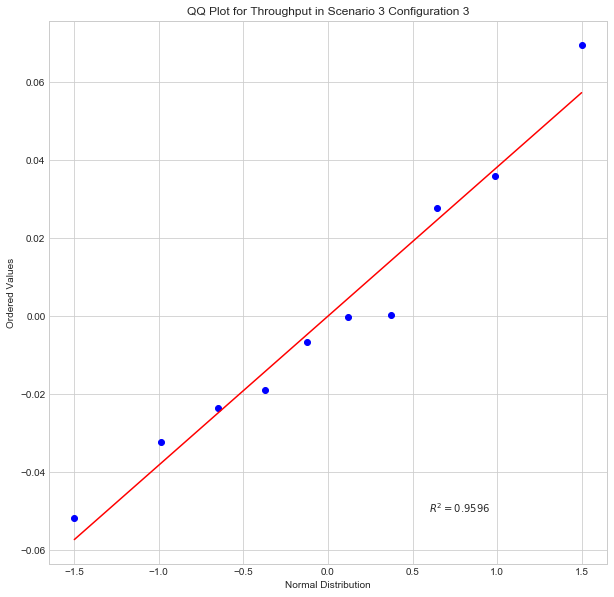

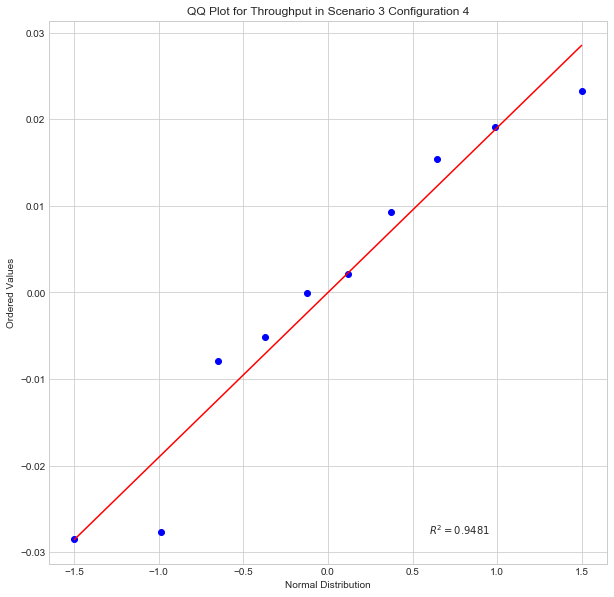

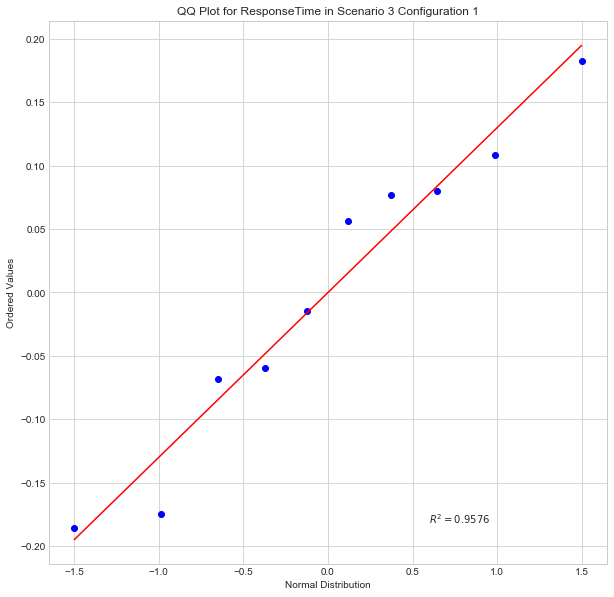

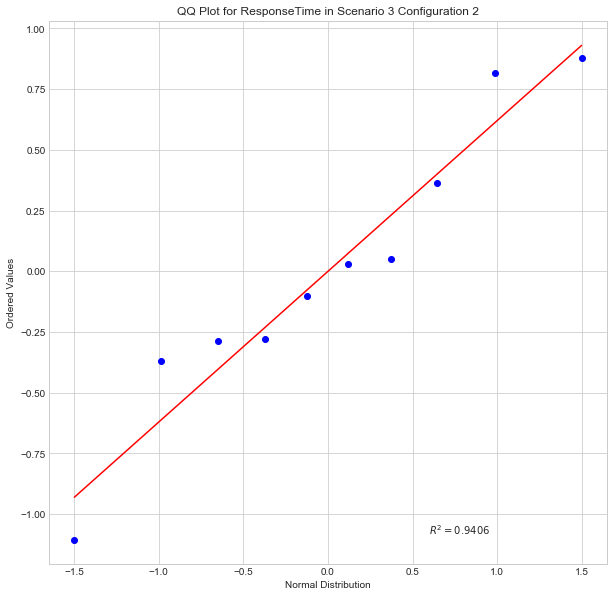

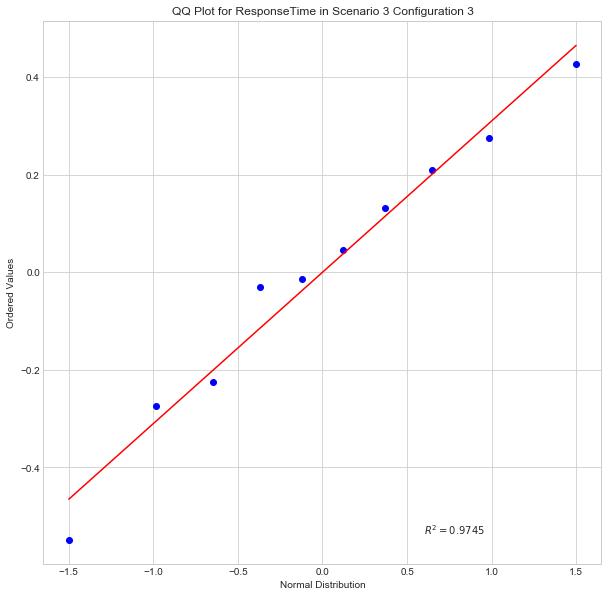

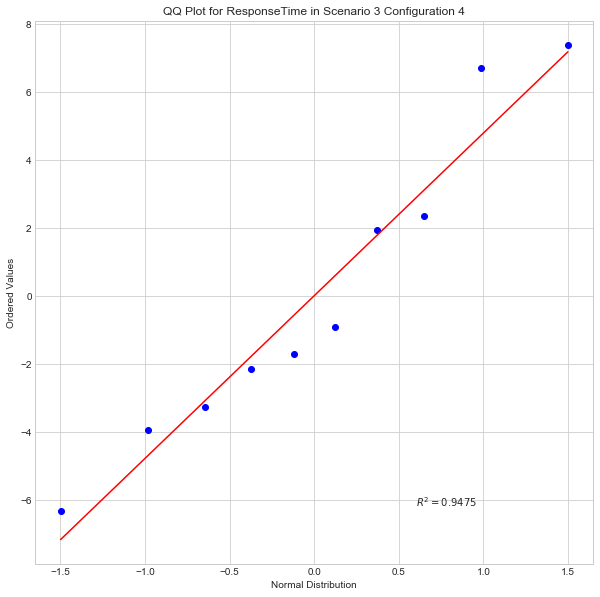

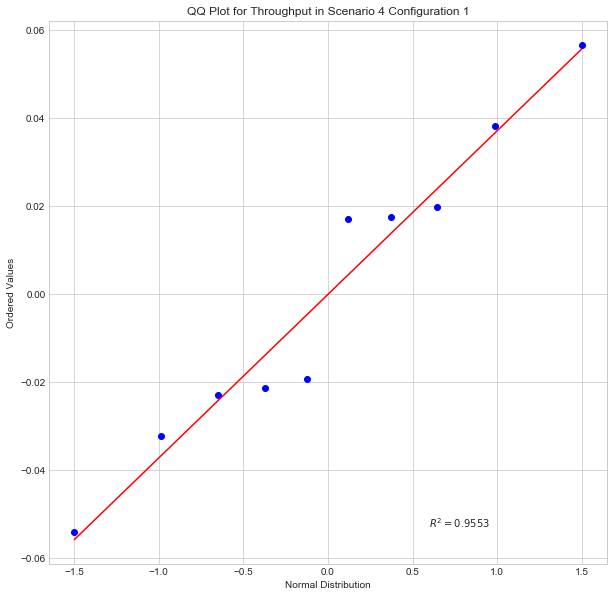

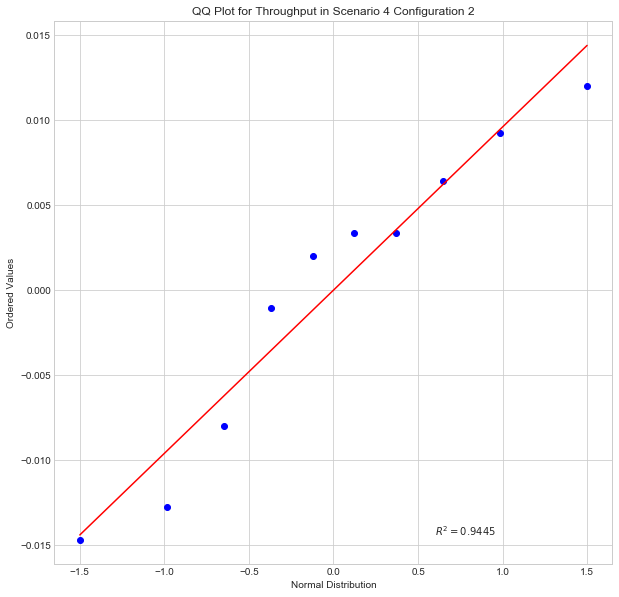

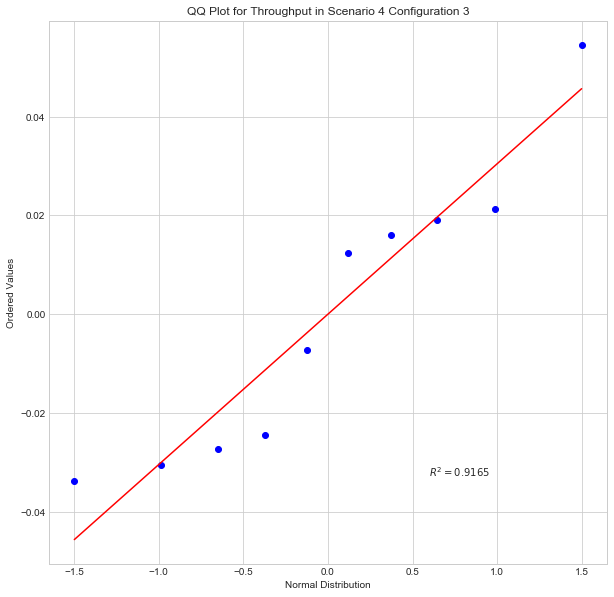

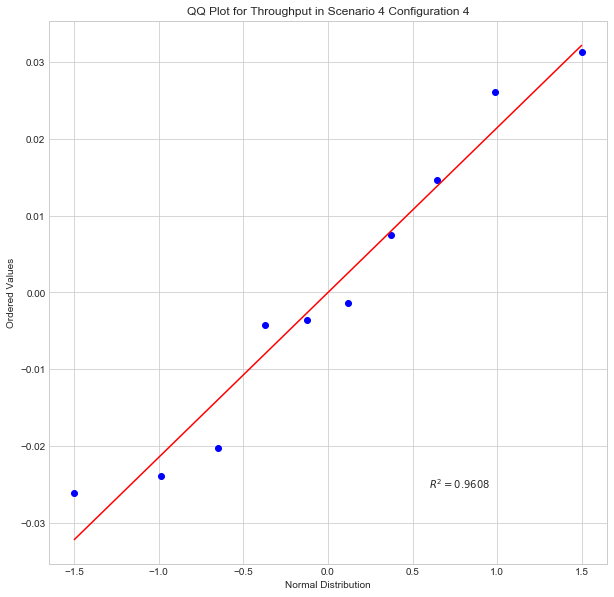

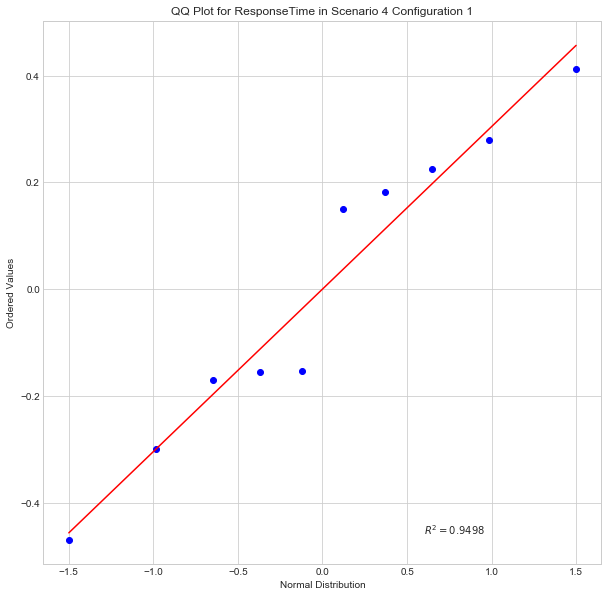

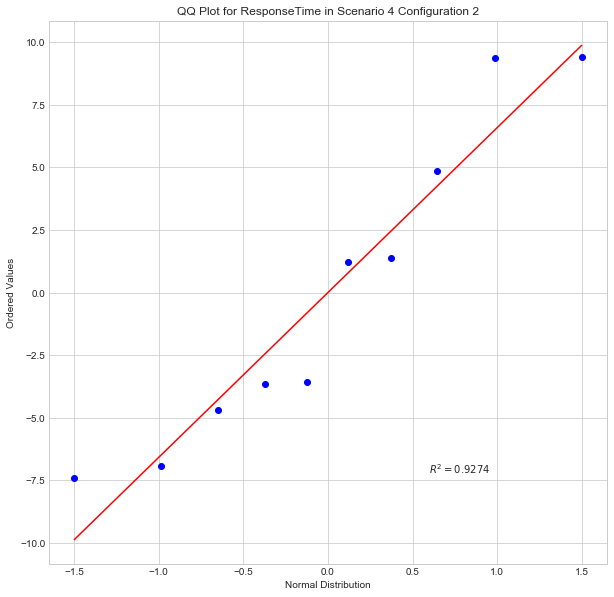

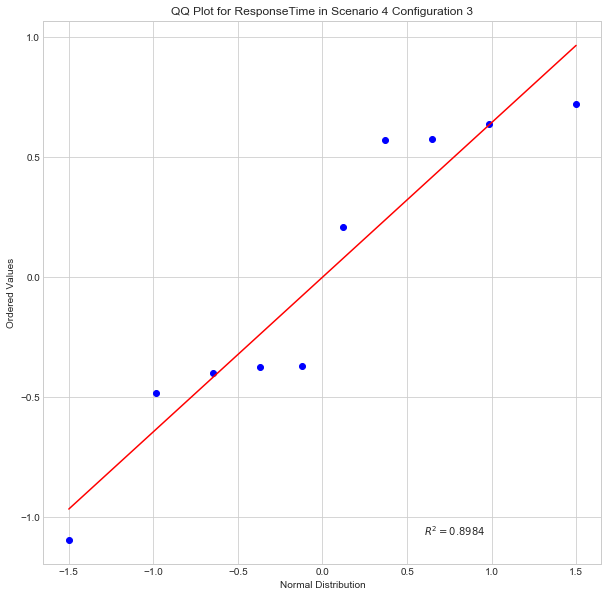

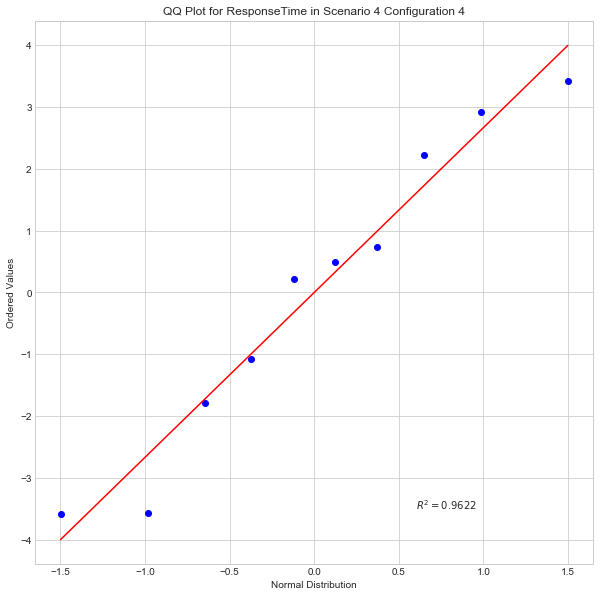

In [75]:
#Reading the excel file
residualsExcel = pd.ExcelFile("../excel/2kr.xlsx")


for sheet in residualsExcel.sheet_names:
    if(sheet!="Foglio9"):
         
        #Getting the excel sheet    
        residualsDataframe = pd.read_excel("../excel/2kr.xlsx", sheet_name=sheet)

        #Resize the dataframe with the interested columns (iterations) and rows (configurations)
        residualsDataframe=residualsDataframe.loc[finalConfigurationRows,'y1-ym':'y10-ym']
        #print(residualsDataframe)
                        
        #Splitting the excel sheet name for get the name of the scenario and the performance index analyzed
        (performance,scenario)=sheet.split('_')
        
        #For every residual plotting the QQPlot with the correspondent label
        for configIndex,residual in enumerate(residualsDataframe.values):
                        
            #Set the dimensions of the plot
            plt.figure(figsize=(10,10))

            qqPlot = stats.probplot(list(residual), dist='norm',plot=plt,rvalue=True)
            plt.title("QQ Plot for "+performance+" in "+"Scenario "+scenario+ " Configuration "+str(configIndex+1))
            plt.xlabel("Normal Distribution")
        
        
        


# Testing Finite Variance

In [87]:
#Import the residual from 2kr excel sheet
excelSheet=pd.read_excel("../excel/2kr.xlsx",sheet_name='Throughput_2')

#Lock only the part regarding residuals in the excel sheet and sto in a new dataframe
residualDataframe=excelSheet.loc[0:7,'yMean':'y10-ym']

#Rapid check the new dataframe
residualDataframe.head(10)

,yMean,y1-ym,y2-ym,y3-ym,y4-ym,y5-ym,y6-ym,y7-ym,y8-ym,y9-ym,y10-ym
0,23.994000,-0.198722,0.011278,0.009611,-0.065111,0.027389,-0.005667,0.064611,0.229056,-0.115111,0.042667
1,2.410361,0.129917,-0.056472,-0.050361,0.014917,-0.015361,0.010750,0.007139,-0.033139,-0.039250,0.031861
2,4.020694,0.109583,-0.062917,0.140139,-0.049861,-0.165694,0.119028,0.060972,-0.055139,-0.024028,-0.072083
3,2.394083,0.118139,-0.002694,-0.006306,-0.025472,-0.012417,0.044528,-0.050194,-0.046861,-0.058528,0.039806
4,6.025806,0.020306,-0.051639,0.017806,-0.012194,0.066417,-0.051361,0.005028,-0.004139,0.021972,-0.012194
5,2.405472,0.130917,0.006194,-0.009083,0.065083,0.002028,0.005361,-0.050750,-0.144083,0.005917,-0.011583
6,4.022861,0.166028,-0.007306,0.125472,-0.034806,-0.178694,0.036028,0.055472,-0.083694,-0.019528,-0.058972
7,2.394722,0.100833,-0.049722,0.033056,0.064444,0.032778,-0.041389,-0.003333,-0.048889,-0.041667,-0.046111


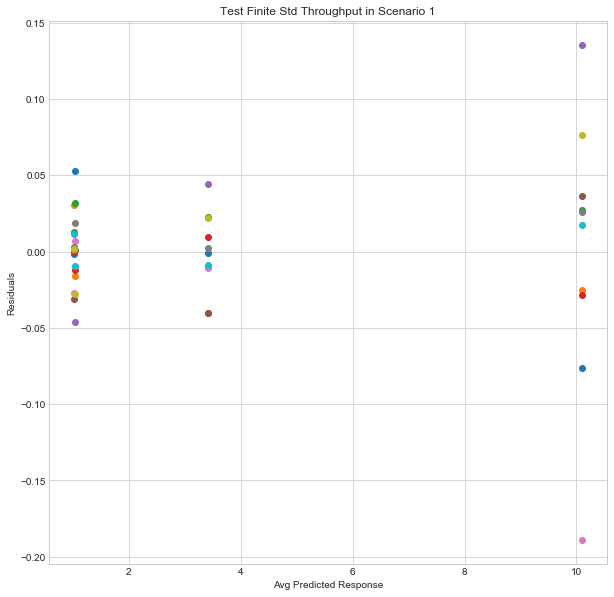

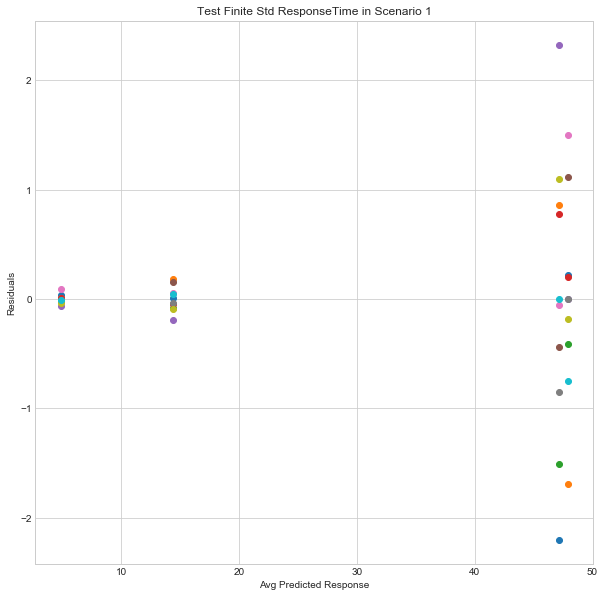

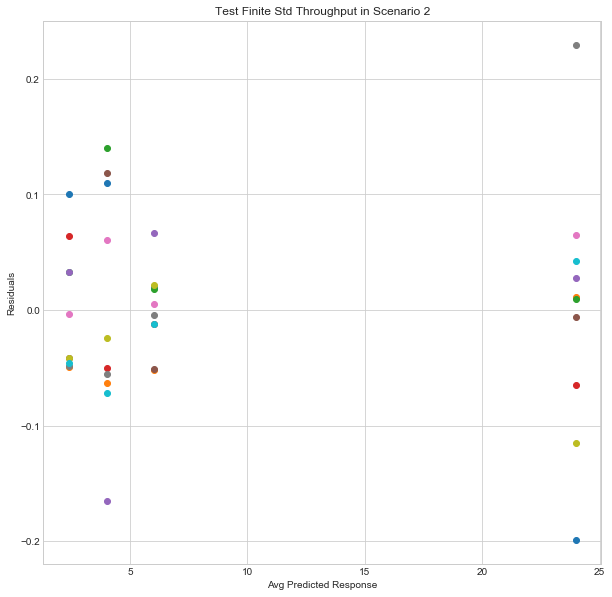

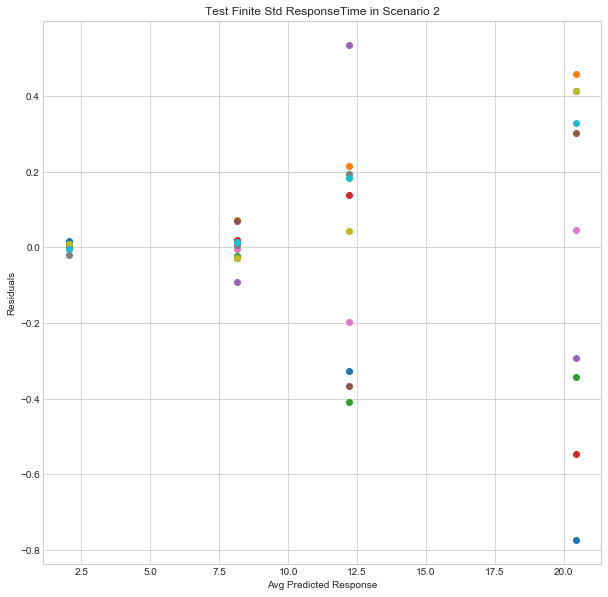

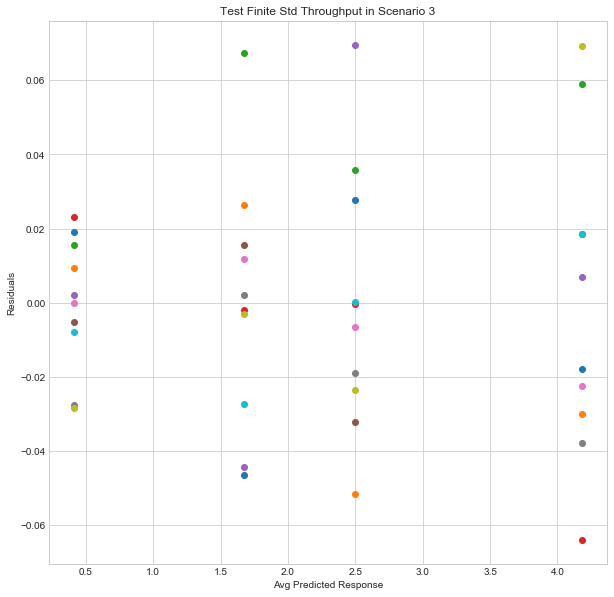

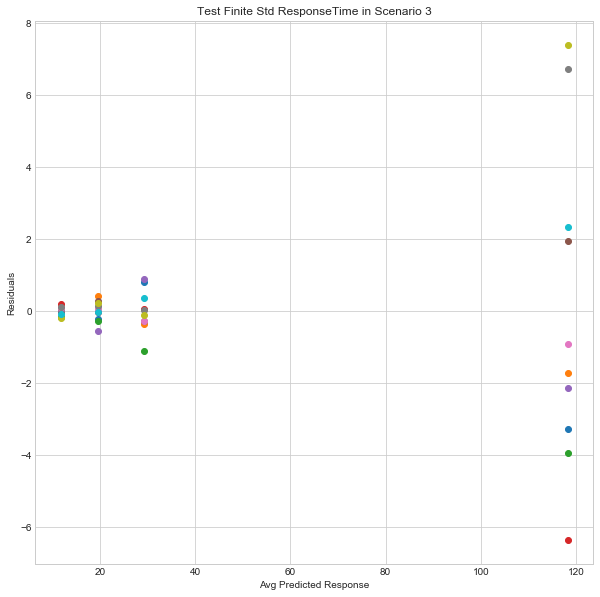

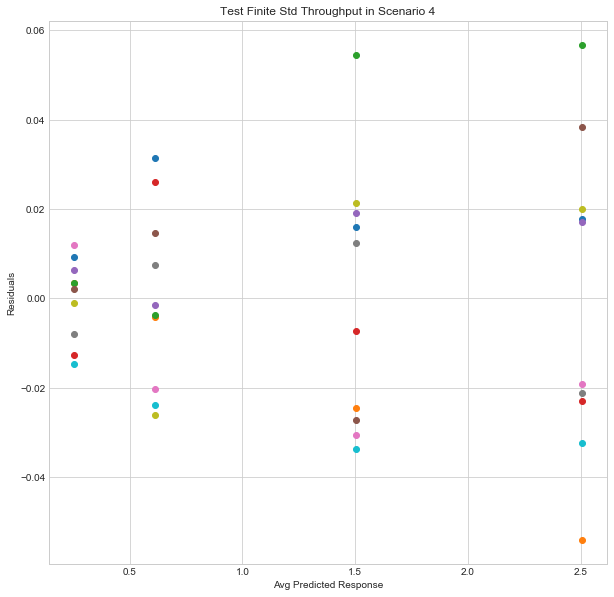

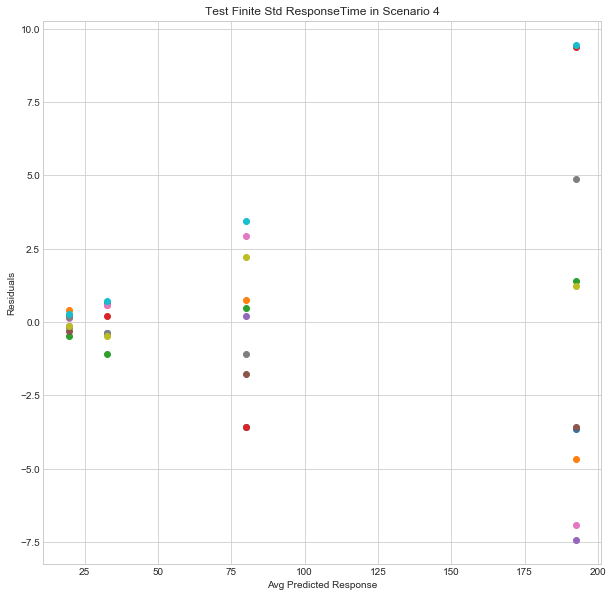

In [100]:
residualsExcel = pd.ExcelFile("../excel/2kr.xlsx")


for sheet in residualsExcel.sheet_names:
    if(sheet!="Foglio9"):
         
        #Getting the excel sheet    
        residualsDataframe = pd.read_excel("../excel/2kr.xlsx", sheet_name=sheet)

        #Resize the dataframe with the interested columns (iterations) and rows (configurations)
        #residualDataframe=residualsDataframe.loc[0:7,'yMean':'y10-ym']        
        residualDataframe=residualsDataframe.loc[finalConfigurationRows,'yMean':'y10-ym']
        x=list(residualDataframe['yMean'])
        residualDataframe.drop(['yMean'],axis=1,inplace=True)
        y=residualDataframe.values.tolist()

        #print(residualsDataframe)
                        
        #Splitting the excel sheet name for get the name of the scenario and the performance index analyzed
        (performance,scenario)=sheet.split('_')

                        
        #Set the dimensions of the plot
        plt.figure(figsize=(10,10))
        plt.style.use('seaborn-whitegrid')



        plt.plot(x, y, 'o')
       

        plt.title("Test Finite Std "+performance+" in "+"Scenario "+scenario)
        plt.xlabel("Avg Predicted Response")
        plt.ylabel("Residuals")

# Testing Indipendence

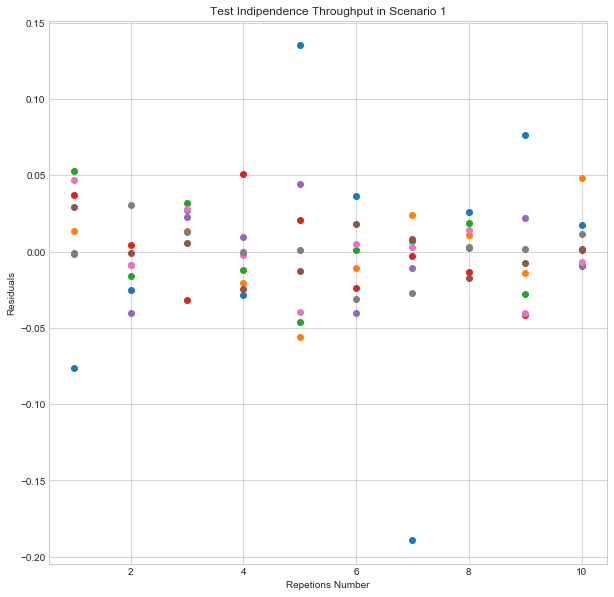

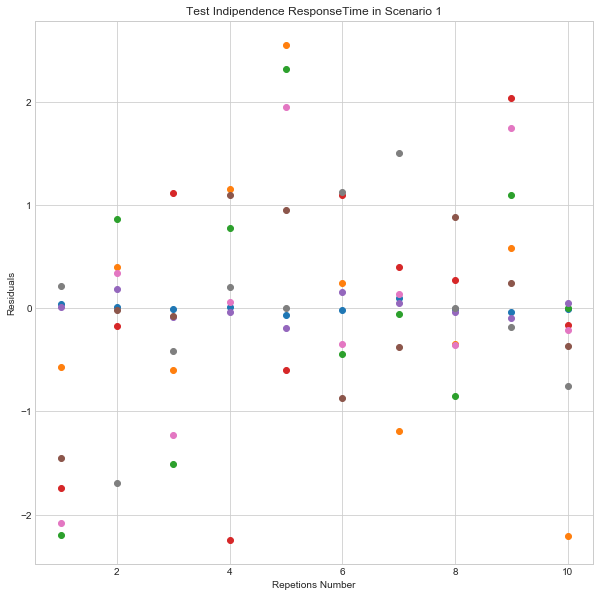

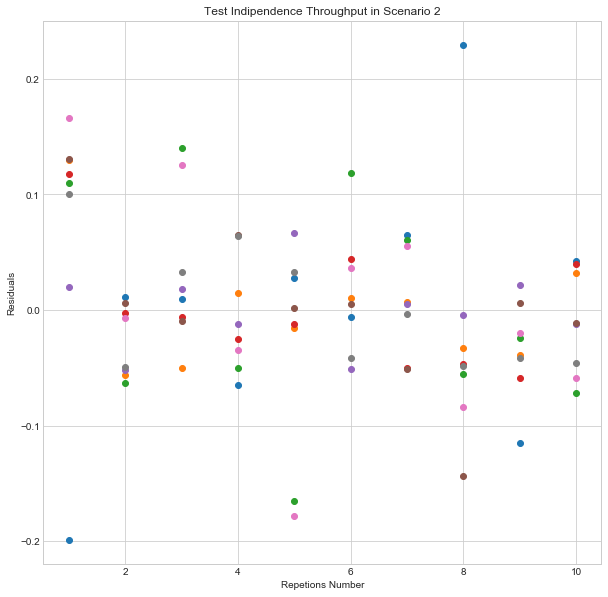

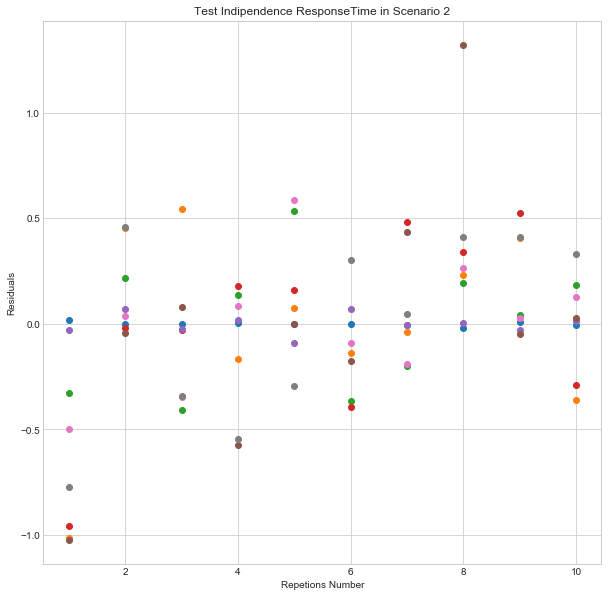

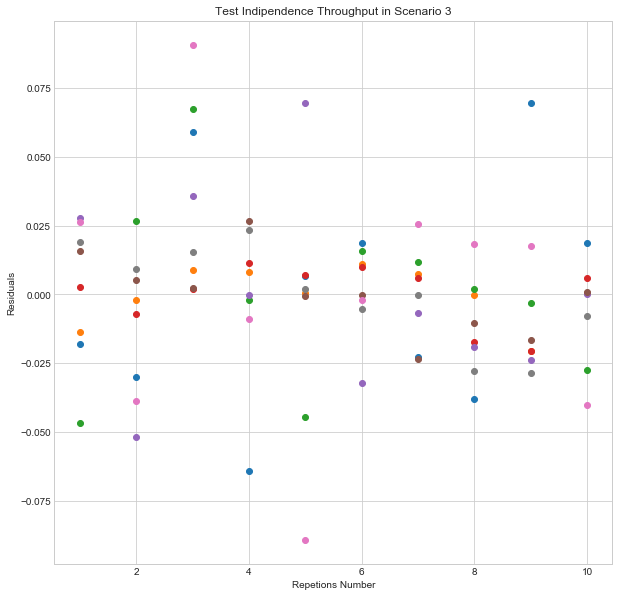

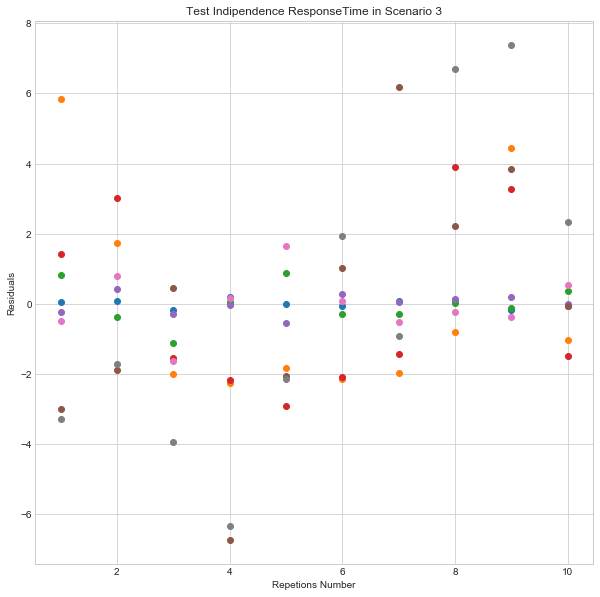

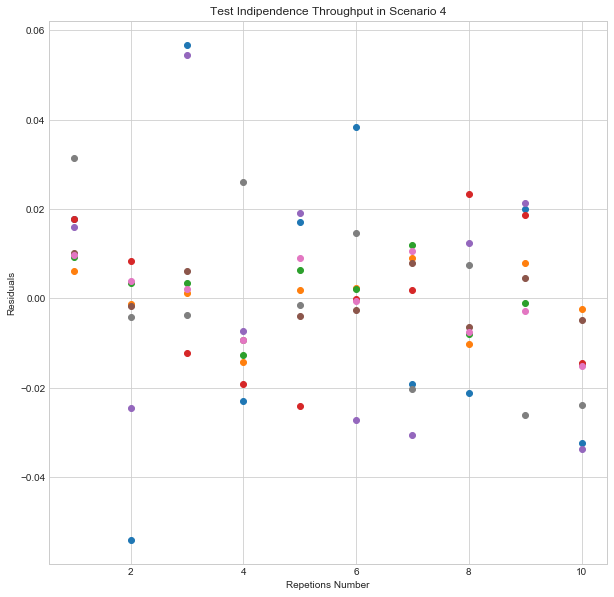

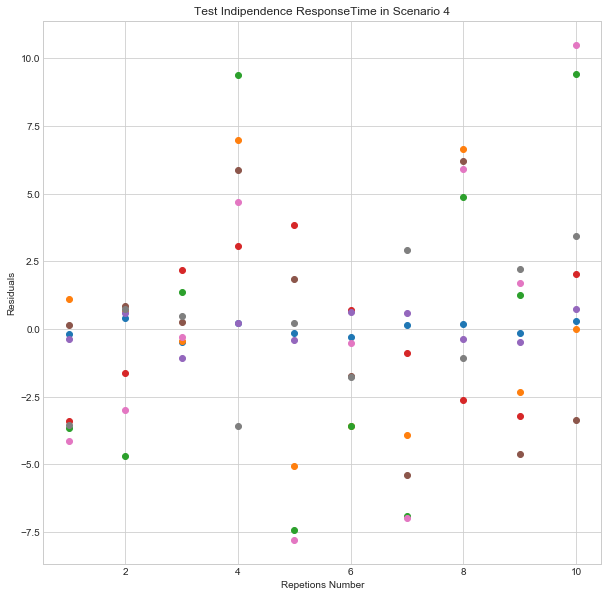

In [109]:
residualsExcel = pd.ExcelFile("../excel/2kr.xlsx")


for sheet in residualsExcel.sheet_names:
    if(sheet!="Foglio9"):
         
        #Getting the excel sheet    
        residualsDataframe = pd.read_excel("../excel/2kr.xlsx", sheet_name=sheet)

        #Resize the dataframe with the interested columns (iterations) and rows (configurations)
        residualDataframe=residualsDataframe.loc[0:7,'yMean':'y10-ym']        
        residualDataframe.drop(['yMean'],axis=1,inplace=True)
        y=residualDataframe.values.tolist()
        y=list(map(list, zip(*y)))
        #Number of observations
        x=[*range(1,len(y)+1,1)]
        


        #print(residualsDataframe)
                        
        #Splitting the excel sheet name for get the name of the scenario and the performance index analyzed
        (performance,scenario)=sheet.split('_')

                        
        #Set the dimensions of the plot
        plt.figure(figsize=(10,10))
        plt.style.use('seaborn-whitegrid')



        plt.plot(x, y, 'o')
       

        plt.title("Test Indipendence "+performance+" in "+"Scenario "+scenario)
        plt.xlabel("Repetions Number")
        plt.ylabel("Residuals")